In [2]:
import re
import pdfplumber
import pandas as pd
from collections import namedtuple

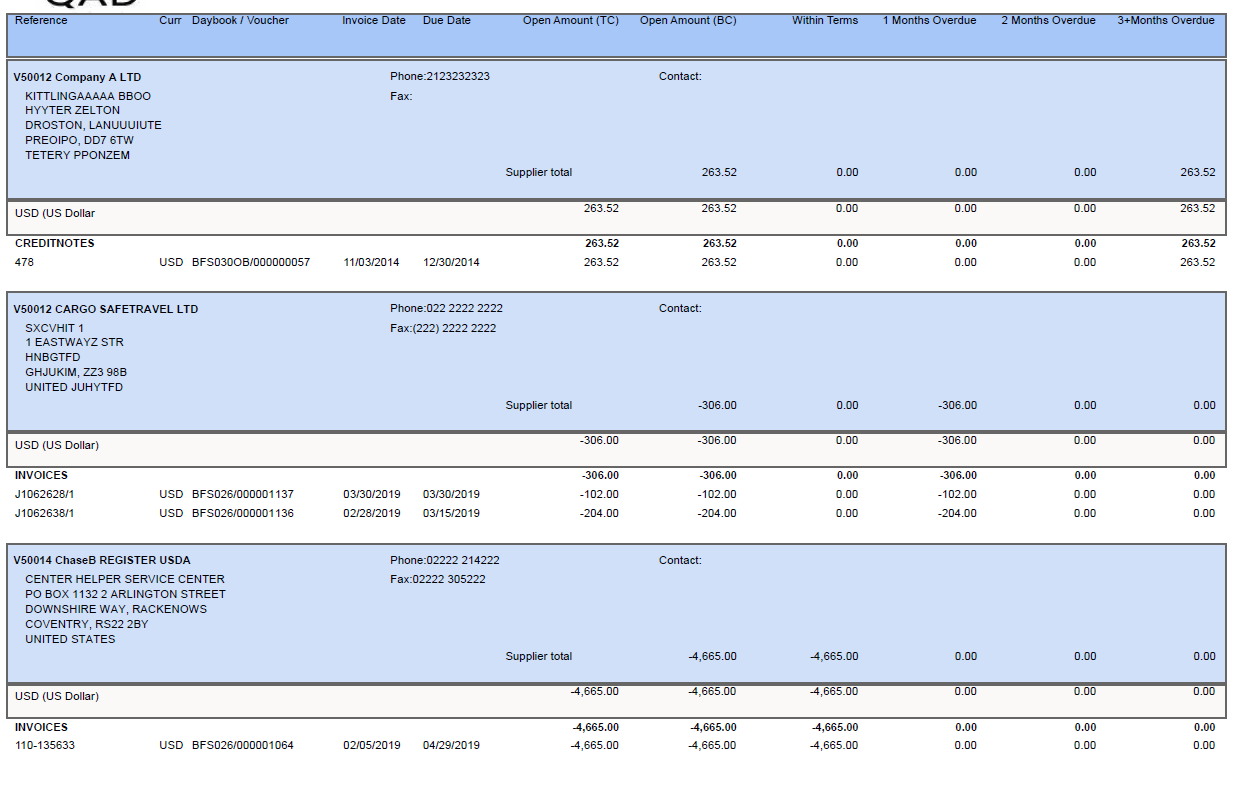

In [32]:
from PIL import Image
logo = Image.open(r'C:\Users\karteek\Downloads\1.PNG')
logo

In [33]:
Line = namedtuple('Line', 'company_id company_name doctype reference currency voucher inv_date due_date open_amt_tc open_amt_bc current months1 months2 months3')

In [34]:
company_re = re.compile(r'(V\d+) (.*) Phone:')
line_re = re.compile(r'\d{2}/\d{2}/\d{4} \d{2}/\d{2}/\d{4}')

In [35]:
file = 'Sample Report.pdf'

In [36]:
lines = []
total_check = 0

with pdfplumber.open(file) as pdf:
    pages = pdf.pages
    for page in pdf.pages:
        text = page.extract_text()
        for line in text.split('\n'):
            print(line)
            comp = company_re.search(line)
            if comp:
                vend_no, vend_name = comp.group(1), comp.group(2)

            elif line.startswith('INVOICES'):
                doctype = 'INVOICE'

            elif line.startswith('CREDITNOTES'):
                doctype = 'CREDITNOTE'

            elif line_re.search(line):
                items = line.split()
                lines.append(Line(vend_no, vend_name, doctype, *items))
                
            elif line.startswith('Supplier total'):
                tot = float(line.split()[2].replace(',', ''))
                total_check += tot

Analysis History AGA Beltes
Page 1 / 53
Reference Curr Daybook / Voucher Invoice Date Due Date Open Amount (TC) Open Amount (BC) Within Terms  1 Months Overdue  2 Months Overdue  3+Months Overdue
V50012 Company A LTD Phone:2123232323  Contact:  
KITTLINGAAAAA BBOO  Fax:
HYYTER ZELTON 
DROSTON, LANUUUIUTE 
PREOIPO, DD7 6TW 
TETERY PPONZEM
Supplier total  263.52  0.00  0.00  0.00  263.52
 263.52  263.52  0.00  0.00  0.00  263.52
USD (US Dollar
CREDITNOTES  263.52  263.52  0.00  0.00  0.00  263.52
478 USD  BFS030OB/000000057 11/03/2014 12/30/2014  263.52  263.52  0.00  0.00  0.00  263.52
V50012 CARGO SAFETRAVEL LTD Phone:022 2222 2222  Contact:  
SXCVHIT 1 Fax:(222) 2222 2222
1 EASTWAYZ STR 
HNBGTFD 
GHJUKIM, ZZ3 98B 
UNITED JUHYTFD
Supplier total -306.00  0.00 -306.00  0.00  0.00
-306.00 -306.00  0.00 -306.00  0.00  0.00
USD (US Dollar)
INVOICES -306.00 -306.00  0.00 -306.00  0.00  0.00
J1062628/1 USD  BFS026/000001137 03/30/2019 03/30/2019 -102.00 -102.00  0.00 -102.00  0.00  0.00
J1062

9032397704 USD  BFS026/000001127 02/19/2019 03/30/2019 -365.96 -365.96  0.00 -365.96  0.00  0.00
9032747985 USD  BFS026/000001159 03/21/2019 04/30/2019 -375.32 -375.32 -375.32  0.00  0.00  0.00
V50023 ELEGANT TIMBER SERVICE Phone: 011 2212 1234  Contact: sara 028 9111 0111
227 Glenville Avenue  Fax:(028) 9111 2111
Whitetownas, Newtownabbey 
NORTHERN IRELAND 
NEWTOWNABBEY, BT37 OZZ 
JAMAICA ISLAND
Supplier total -8,280.63 -8,280.63  0.00  0.00  0.00
-8,280.63 -8,280.63 -8,280.63  0.00  0.00  0.00
USD (US Dollar)
INVOICES -8,280.63 -8,280.63 -8,280.63  0.00  0.00  0.00
1224 USD  BFS026/000000804 02/12/2019 03/31/2019 -82.26 -82.26 -82.26  0.00  0.00  0.00
1266 USD  BFS026/000000805 02/14/2019 03/31/2019 -786.14 -786.14 -786.14  0.00  0.00  0.00
1281 USD  BFS026/000000894 02/12/2019 03/31/2019 -138.85 -138.85 -138.85  0.00  0.00  0.00
1301 USD  BFS026/000000806 02/12/2019 03/31/2019 -563.70 -563.70 -563.70  0.00  0.00  0.00
1307 USD  BFS026/000000807 02/14/2019 03/31/2019 -218.49 -218.49 

Analysis History AGA Beltes
Page 9 / 53
Reference Curr Daybook / Voucher Invoice Date Due Date Open Amount (TC) Open Amount (BC) Within Terms  1 Months Overdue  2 Months Overdue  3+Months Overdue
-5,976.46 -5,976.46  0.00  0.00 -5,976.46  0.00
USD (US Dollar)
INVOICES -5,976.46 -5,976.46  0.00  0.00 -5,976.46  0.00
23016825 USD  BFS026/000001119 02/17/2019 02/17/2019 -5,976.46 -5,976.46  0.00  0.00 -5,976.46  0.00
V50082 AIRPLANE ENERGY SUPPLY  LTD Phone:0845 601 9999  Contact:  
2ND FLOOR Fax:
83-85 GREAT ANGER STREET 
KNOWHERE
FLUSHING, BL1 4OP
UNITED STATES
Supplier total -10,262.87  0.00 -10,262.87  0.00  0.00
-10,262.87 -10,262.87  0.00 -10,262.87  0.00  0.00
USD (US Dollar)
INVOICES -10,262.87 -10,262.87  0.00 -10,262.87  0.00  0.00
793424650 USD  BFS026/000000866 02/15/2019 03/30/2019 -10,262.87 -10,262.87  0.00 -10,262.87  0.00  0.00
V50086 CALESTON INDUSTRIES Phone:0141 222 5555  Contact: COREY STEFON 0111 232 4666
5 APTOL AVENUE  Fax:0141 222 4444
HILLINGTON PARK 
HARROWS 
HA

In [37]:
df = pd.DataFrame(lines)
df.head()

,company_id,company_name,doctype,reference,currency,voucher,inv_date,due_date,open_amt_tc,open_amt_bc,current,months1,months2,months3
0,V50012,Company A LTD,CREDITNOTE,478,USD,BFS030OB/000000057,11/03/2014,12/30/2014,263.52,263.52,0.00,0.00,0.00,263.52
1,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062628/1,USD,BFS026/000001137,03/30/2019,03/30/2019,-102.00,-102.00,0.00,-102.00,0.00,0.00
2,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062638/1,USD,BFS026/000001136,02/28/2019,03/15/2019,-204.00,-204.00,0.00,-204.00,0.00,0.00
3,V50014,ChaseB REGISTER USDA,INVOICE,110-135633,USD,BFS026/000001064,02/05/2019,04/29/2019,"-4,665.00","-4,665.00","-4,665.00",0.00,0.00,0.00
4,V50015,METALS CHEMICALS GROUP LIMITED,INVOICE,SI191433,USD,BFS026/000000908,02/12/2019,03/30/2019,-198.00,-198.00,0.00,-198.00,0.00,0.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    131 non-null    object
 1   company_name  131 non-null    object
 2   doctype       131 non-null    object
 3   reference     131 non-null    object
 4   currency      131 non-null    object
 5   voucher       131 non-null    object
 6   inv_date      131 non-null    object
 7   due_date      131 non-null    object
 8   open_amt_tc   131 non-null    object
 9   open_amt_bc   131 non-null    object
 10  current       131 non-null    object
 11  months1       131 non-null    object
 12  months2       131 non-null    object
 13  months3       131 non-null    object
dtypes: object(14)
memory usage: 14.5+ KB


In [38]:
df['inv_date'] = pd.to_datetime(df['inv_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [39]:
df

,company_id,company_name,doctype,reference,currency,voucher,inv_date,due_date,open_amt_tc,open_amt_bc,current,months1,months2,months3
0,V50012,Company A LTD,CREDITNOTE,478,USD,BFS030OB/000000057,2014-11-03,2014-12-30,263.52,263.52,0.00,0.00,0.00,263.52
1,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062628/1,USD,BFS026/000001137,2019-03-30,2019-03-30,-102.00,-102.00,0.00,-102.00,0.00,0.00
2,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062638/1,USD,BFS026/000001136,2019-02-28,2019-03-15,-204.00,-204.00,0.00,-204.00,0.00,0.00
3,V50014,ChaseB REGISTER USDA,INVOICE,110-135633,USD,BFS026/000001064,2019-02-05,2019-04-29,"-4,665.00","-4,665.00","-4,665.00",0.00,0.00,0.00
4,V50015,METALS CHEMICALS GROUP LIMITED,INVOICE,SI191433,USD,BFS026/000000908,2019-02-12,2019-03-30,-198.00,-198.00,0.00,-198.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,V50097,AT&T GLOBAL NETWORK SERVICES (US) BV,INVOICE,47255724,USD,BFS026/000001019,2019-03-15,2019-04-30,"-1,137.14","-1,137.14","-1,137.14",0.00,0.00,0.00
127,V50098,PLASTIC COATINGS LTD,INVOICE,234560,USD,BFS026/000000393,2019-01-30,2019-04-01,-480.00,-480.00,-480.00,0.00,0.00,0.00
128,V50102,TECHNICAL METALS LTD,INVOICE,221233,USD,BFS026/000000994,2019-02-26,2019-03-30,-30.00,-30.00,0.00,-30.00,0.00,0.00
129,V50102,TECHNICAL METALS LTD,INVOICE,221234,USD,BFS026/000000995,2019-02-26,2019-03-30,-30.00,-30.00,0.00,-30.00,0.00,0.00


In [40]:
for col in df.columns[-6:]:
    df[col] = df[col].map(lambda x: float(str(x).replace(',', '')))

In [41]:
df['open_amt_bc'].sum()

-129580.73999999999

In [16]:
df.to_csv('invoices.csv', index=False)

In [42]:
df

,company_id,company_name,doctype,reference,currency,voucher,inv_date,due_date,open_amt_tc,open_amt_bc,current,months1,months2,months3
0,V50012,Company A LTD,CREDITNOTE,478,USD,BFS030OB/000000057,2014-11-03,2014-12-30,263.52,263.52,0.00,0.0,0.0,263.52
1,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062628/1,USD,BFS026/000001137,2019-03-30,2019-03-30,-102.00,-102.00,0.00,-102.0,0.0,0.00
2,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062638/1,USD,BFS026/000001136,2019-02-28,2019-03-15,-204.00,-204.00,0.00,-204.0,0.0,0.00
3,V50014,ChaseB REGISTER USDA,INVOICE,110-135633,USD,BFS026/000001064,2019-02-05,2019-04-29,-4665.00,-4665.00,-4665.00,0.0,0.0,0.00
4,V50015,METALS CHEMICALS GROUP LIMITED,INVOICE,SI191433,USD,BFS026/000000908,2019-02-12,2019-03-30,-198.00,-198.00,0.00,-198.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,V50097,AT&T GLOBAL NETWORK SERVICES (US) BV,INVOICE,47255724,USD,BFS026/000001019,2019-03-15,2019-04-30,-1137.14,-1137.14,-1137.14,0.0,0.0,0.00
127,V50098,PLASTIC COATINGS LTD,INVOICE,234560,USD,BFS026/000000393,2019-01-30,2019-04-01,-480.00,-480.00,-480.00,0.0,0.0,0.00
128,V50102,TECHNICAL METALS LTD,INVOICE,221233,USD,BFS026/000000994,2019-02-26,2019-03-30,-30.00,-30.00,0.00,-30.0,0.0,0.00
129,V50102,TECHNICAL METALS LTD,INVOICE,221234,USD,BFS026/000000995,2019-02-26,2019-03-30,-30.00,-30.00,0.00,-30.0,0.0,0.00


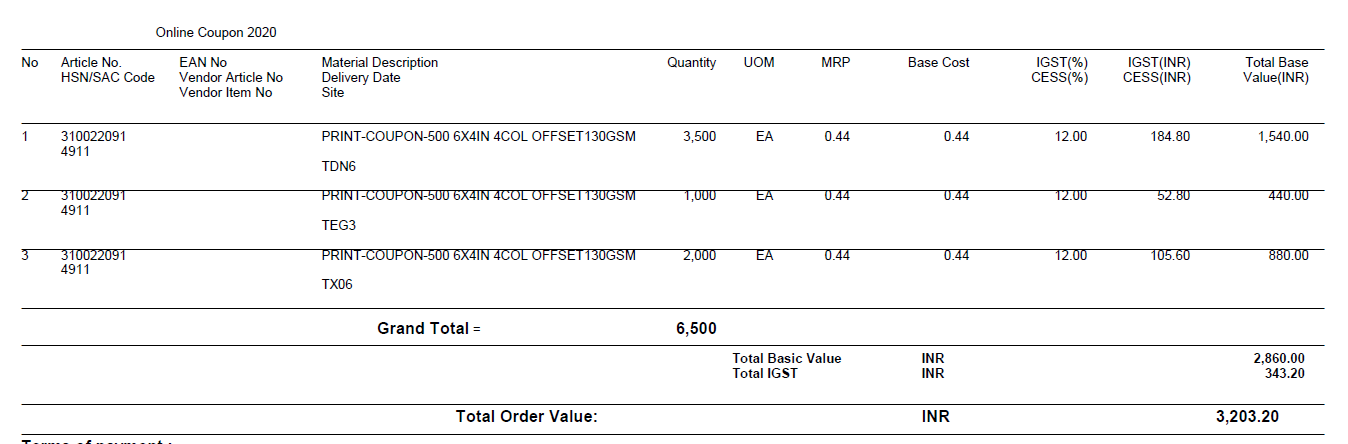

In [31]:
logo = Image.open(r'C:\Users\karteek\Downloads\2.PNG')
logo

In [18]:
from collections import namedtuple
import re
import pdfplumber
import pandas as pd

In [43]:
Line = namedtuple('Line', 'No Article Desc Quant UOM MRP BaseCost IGST_perc IGST_INR Total_Base HSN_SAC_Code Site')

In [44]:
line_re = re.compile(r'\d \d{2,}')

In [45]:
def numbify(num):
    return float(num.replace('$', '').replace(',', ''))

In [46]:
with pdfplumber.open("samp.pdf") as pdf:
    page = pdf.pages[0]
    text = page.extract_text(x_tolerance=2, y_tolerance=0)

In [47]:

data = []

with pdfplumber.open("samp.pdf") as pdf:
    page = pdf.pages[0]
    text = page.extract_text(x_tolerance=2, y_tolerance=0)
    
    for line in text.split('\n'):
        if line_re.search(line):
            in_lines = True
            no, article, *desc, quant, uom, mrp, basecost, igstp, igst_inr, total_base = line.split()
            desc = ' '.join(desc)
        elif line.startswith('Grand'):
            break
        elif re.match(r'\d{4}', line):
            hsn_code = line
        elif re.match(r'T\S{3}', line):
            site = line
            line_info = Line(no, article, desc, quant, uom, mrp, basecost, igstp, igst_inr, total_base, hsn_code, site)
            data.append(line_info)

In [48]:
df = pd.DataFrame(data)
df

,No,Article,Desc,Quant,UOM,MRP,BaseCost,IGST_perc,IGST_INR,Total_Base,HSN_SAC_Code,Site
0,1,310022091,PRINT-COUPON-500 6X4IN 4COL OFFSET130GSM,"3,500",EA,0.44,0.44,12.00,184.80,"1,540.00",4911,TDN6
1,2,310022091,PRINT-COUPON-500 6X4IN 4COL OFFSET130GSM,"1,000",EA,0.44,0.44,12.00,52.80,440.00,4911,TEG3
2,3,310022091,PRINT-COUPON-500 6X4IN 4COL OFFSET130GSM,"2,000",EA,0.44,0.44,12.00,105.60,880.00,4911,TX06


In [49]:
df['Total_Base'] = df['Total_Base'].map(numbify)

In [50]:
df['IGST_INR'] = df['IGST_INR'].map(numbify)
sum(df['IGST_INR'])

343.20000000000005

In [27]:
df.to_csv('file.csv', index=False)

In [51]:
df

,No,Article,Desc,Quant,UOM,MRP,BaseCost,IGST_perc,IGST_INR,Total_Base,HSN_SAC_Code,Site
0,1,310022091,PRINT-COUPON-500 6X4IN 4COL OFFSET130GSM,"3,500",EA,0.44,0.44,12.00,184.8,1540.0,4911,TDN6
1,2,310022091,PRINT-COUPON-500 6X4IN 4COL OFFSET130GSM,"1,000",EA,0.44,0.44,12.00,52.8,440.0,4911,TEG3
2,3,310022091,PRINT-COUPON-500 6X4IN 4COL OFFSET130GSM,"2,000",EA,0.44,0.44,12.00,105.6,880.0,4911,TX06
